## IPBMA_7: CT Sinogram
### Author: Liu Cong and Ulloa Ferrer,Leonardo

In [1]:
import numpy as np
import matplotlib.pyplot as pyplot

In [2]:
import sys, os
from auxFiles.auxFnc import *

try:
    auxFnc = os.path.join(sys.path[0], 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join(sys.path[0], 'auxFiles', 'phantomsFnc.py')
    %run {auxFnc}
    %run {phantomsFnc}
except:
    auxFnc = os.path.join('.', 'auxFiles', 'auxFnc.py')
    phantomsFnc = os.path.join('.', 'auxFiles', 'phantomsFnc.py')
    %run {phantomsFnc}
    %run {auxFnc}

In [3]:
# X-RAY SOURCE

kVp= 100
I0= 75000  
N0, eE= source(kVp, I0)

print(N0, eE)

75000 40.0


In [4]:
# OBJECT

edge_size= 256
eE= 40
obj= cube_phantom_h(edge_size, eE)

0.28 1.28


In [5]:
# CT INTERACTOR

nProjections= 180
h= 128
qSinograma= interactor_CT(N0, obj, h, nProjections)

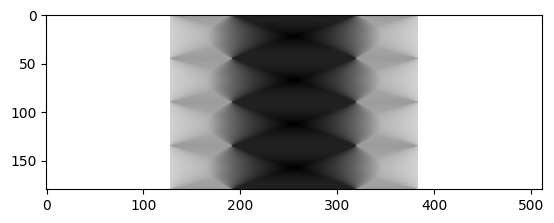

In [6]:
pyplot.imshow(qSinograma, cmap="gray")
pyplot.show()

In [7]:
# DETECTOR
nDetectors=64

dSinograma= detectorSinogram(qSinograma, nProjections, nDetectors)

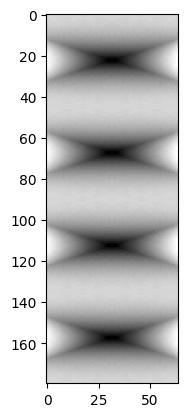

In [8]:
pyplot.imshow(dSinograma, cmap="gray")
pyplot.show()

In [9]:
# PROCESSING

pSinograma= process_CT(dSinograma, N0)

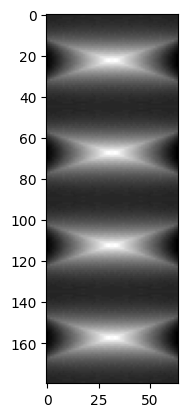

In [10]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()

SAVE GENERIC SINOGRAM

In [11]:
# FEATURES
nProjections= 360
h= 128
nDetectors= 512

In [12]:
qSinograma= interactor_CT(N0, obj, h, nProjections)

In [13]:
dSinograma= detectorSinogram(qSinograma, nProjections, nDetectors)

In [14]:
pSinograma= process_CT(dSinograma, N0)

In [15]:
np.save("sinogram.npy", pSinograma)

In [16]:
pyplot.imsave("sinogram.png", pSinograma, cmap='gray')

In [17]:
pSinograma= np.load('sinogram.npy')

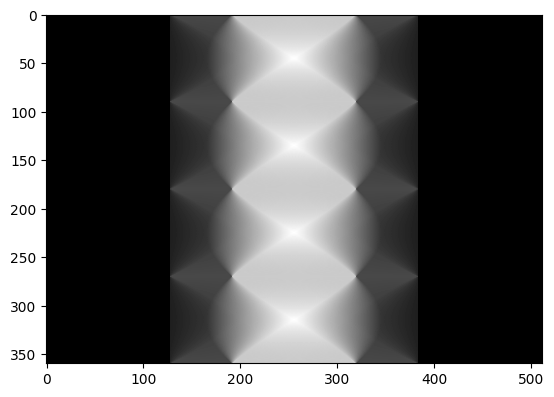

In [18]:
pyplot.imshow(pSinograma, cmap="gray")
pyplot.show()